# Churn - ML Model Performance

## Set-up

Initializing environment

### Autoreload
Python magic to update source (src) libraries without restarting the kernel or importing.

In [1]:
%load_ext autoreload
%autoreload 2

### Set Up Environment
Importing libraries from both the conda environment and locally. Also prepping notebook-wide variables such as brand colours, and initialising plotting engines & parameters.

In [2]:
model = 'iplayer'

In [3]:
# Admin things
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from time import time
import pickle

# Number things
import pandas as pd
import numpy as np
import math
from scipy import interp

# Picture things
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

# Machine learning things
import shap

%matplotlib inline

# My things
from src import utils
from src import fi

# BBC colours
bbc = {'r':'#850200',
          'b':'#156E90',
          'y':'#F79B14',
          'o':'#F74B3A',
          'g':'#00A878',
          'dg':'#026A4C'}

bbc_hsl = {'r':0.9,
          'b':196.59,
          'y':35.68,
          'o':5.4,
          'g':162.6,
          'dg':162.6}

my_cmap = sns.diverging_palette(
    bbc_hsl['r'], bbc_hsl['b'], s=80, l=50, center='light',
    as_cmap=True
)


# Environmental params
# plt.style.use('dark_background')
# sns.set(style='darkgrid')
jtplot.style('grade3')

# load JS visualization code to notebook
shap.initjs()

# Directories
pickle_dir = 'pickles/'+model

# Plot distibutions of variables? Slow on large datasets
plot_distributions = False

## Loading model performance data
Generated during model training, see churn-train.ipynb

In [4]:
# Unpack model interpretation ingredients (see churn-train.ipynb)
with open(pickle_dir+'/perf/little_roc.pickle', 'rb') as input_file:
    roc_dict = pickle.load(input_file)
    
with open(pickle_dir+'/perf/stack_roc.pickle', 'rb') as input_file:
    blend_ROC = pickle.load(input_file)

## Weak learners
Performance of the child models in isolation

In [5]:
### Confusion Matrix


### ROC charts
**R**eciever **O**perator **Characteristic** charts show the true positive and false positive rates for a binary classification, at different **threshold values**. Threshold values are the minimum predicted score for a data point to be classified as a 1 (positive).

head mean_tpr: [0.0035287  0.08563482 0.1439499  0.18750248 0.22643285 0.25915067
 0.28812768 0.31682343 0.34383843]
head mean_fpr: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808]
head mean_tpr: [1.58033372e-04 4.43677561e-02 8.78389507e-02 1.25032684e-01
 1.60723969e-01 1.92313444e-01 2.24430565e-01 2.55939007e-01
 2.87180124e-01]
head mean_fpr: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808]
head mean_tpr: [0.00031598 0.0233821  0.03803401 0.05600611 0.07287605 0.08890816
 0.10359725 0.11710667 0.12989152]
head mean_fpr: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808]
head mean_tpr: [0.00015801 0.01356076 0.02701895 0.04076031 0.05450168 0.06824304
 0.0819844  0.09572576 0.10946712]
head mean_fpr: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808]


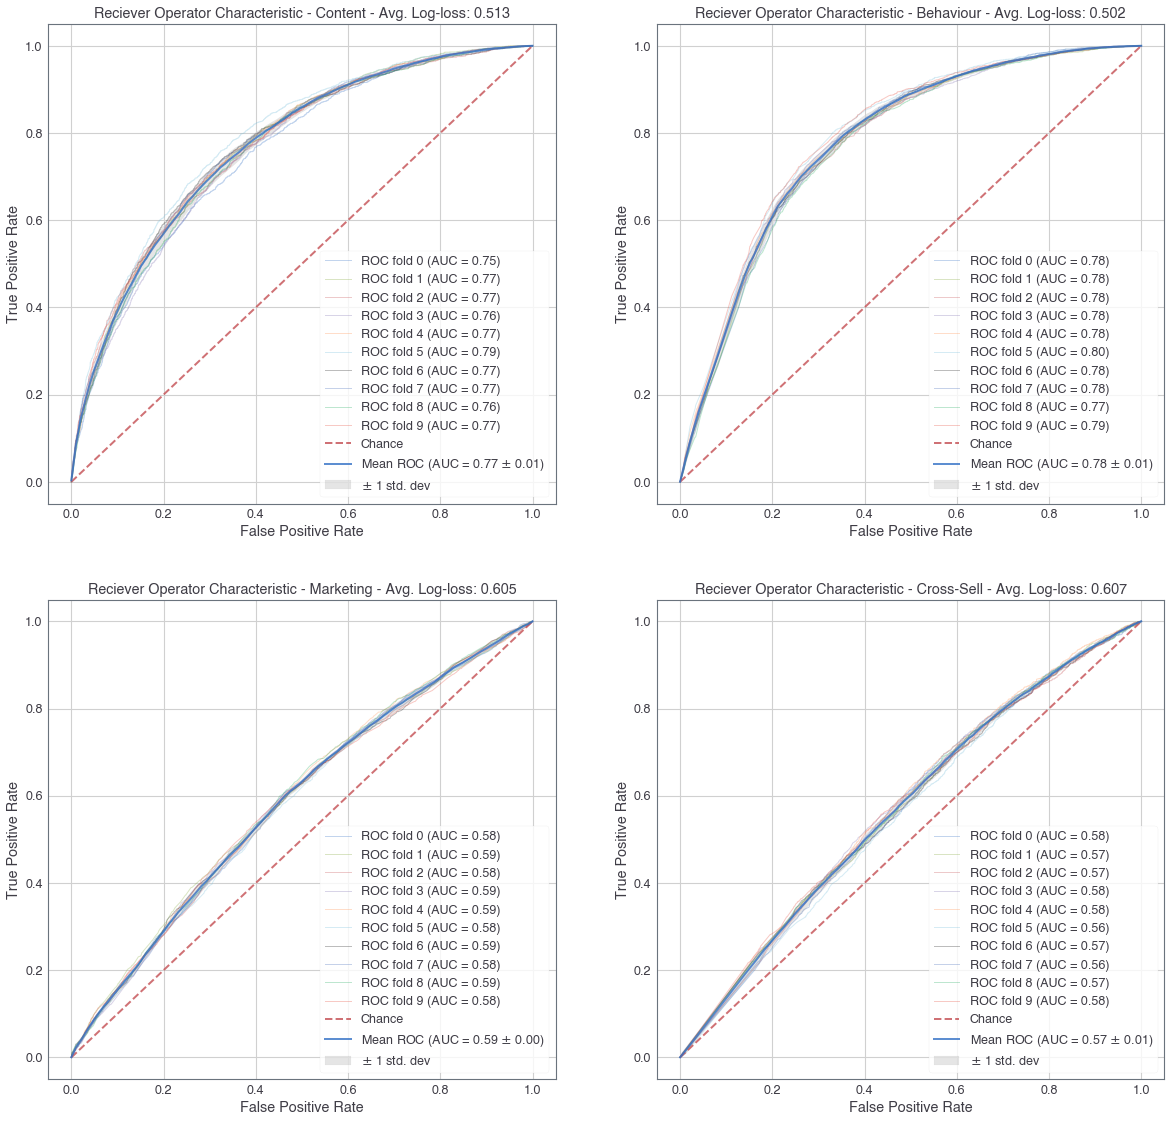

In [6]:
plt.figure(figsize=(20, 30))

for k, (model, perf) in enumerate(zip(roc_dict.keys(), roc_dict.values())):
    plt.subplot(3,2,k+1)
    perf.roc_plot()

## Meta learner
Performance of the meta-learner

### ROC chart

head mean_tpr: [0.00078589 0.08997121 0.15351294 0.19670901 0.23751544 0.27745906
 0.31107299 0.34300809 0.3702103 ]
head mean_fpr: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808]


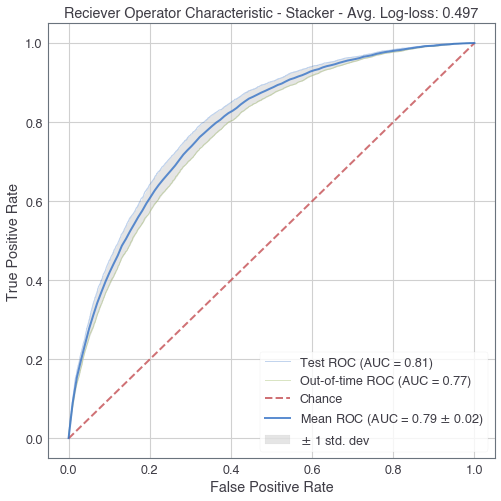

In [7]:
plt.figure(figsize=(8, 8))
blend_ROC.roc_plot()